# Check Regression Assumptions

Haytham Mohamed - INFS890 Spring 2020

This notebook is to check regression Normality and Linearity assumptions of the orders work flow.

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn import preprocessing
from datetime import datetime
from scipy import stats
from sklearn.decomposition import PCA

sns.set()
sns.set(color_codes=True)
#sns.set_color_codes()

pd.options.display.max_rows = 15
pd.options.display.float_format = '{:,.4f}'.format

In [66]:
# 1- read processed file

home_dir = '/Users/hmohamed/github/data-research-spring2020/sock-shop'

file_dir = home_dir + '/processed-data/'
input_file = 'order_flow_cleanup_data.csv'

save=True

In [67]:
def read_df(file_dir, data_file):
    df = pd.read_csv(file_dir + data_file)
    return to_time_series(df)

def to_time_series(df, index_col_name='date'):
    df[index_col_name] = pd.to_datetime(df[index_col_name])
    df.set_index(index_col_name, inplace=True)
    df.sort_index(inplace=True)
    return df

In [68]:
orders_flow_df = read_df(file_dir, input_file)
idx = orders_flow_df.index
orders_flow_df.head(5) 

,front-end_cpu_use,orders_cpu_use,orders-db_cpu_use,user_cpu_use,user-db_cpu_use,shipping_cpu_use,payment_cpu_use,carts_cpu_use,carts-db_cpu_use,front-end_pods,orders_pods,user_pods,shipping_pods,payment_pods,carts_pods,nodes_cpu_use,orders_req,orders_ltcy
date,,,,,,,,,,,,,,,,,,
2020-03-26 19:46:22,0.0300,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.0300,0.0700,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.5000,0.1500,0.9311
2020-03-26 19:46:37,0.0600,0.0200,0.0200,0.0200,0.0200,0.0100,0.0100,0.1800,0.1800,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.8900,0.1500,0.9311
2020-03-26 19:46:52,0.0700,0.0300,0.0200,0.0300,0.0200,0.0100,0.0100,0.4400,0.2000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.3500,0.1500,0.9311
2020-03-26 19:47:07,0.0700,0.0300,0.0200,0.0200,0.0200,0.0100,0.0100,0.2300,0.1700,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.2600,0.1300,0.9311
2020-03-26 19:47:22,0.0700,0.0200,0.0100,0.0200,0.0200,0.0100,0.0100,0.2400,0.1400,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.2800,0.3600,0.9311


# Suffle Data

In [81]:
# shuffle the data
from sklearn.utils import shuffle

orders_flow_df = shuffle(orders_flow_df, random_state=180)
print('shape {}'.format(orders_flow_df.shape))
orders_flow_df.head(5)

shape (3290, 18)


,front-end_cpu_use,orders_cpu_use,orders-db_cpu_use,user_cpu_use,user-db_cpu_use,shipping_cpu_use,payment_cpu_use,carts_cpu_use,carts-db_cpu_use,front-end_pods,orders_pods,user_pods,shipping_pods,payment_pods,carts_pods,nodes_cpu_use,orders_req,orders_ltcy
date,,,,,,,,,,,,,,,,,,
2020-03-27 12:01:22,1.6600,0.5100,0.0200,0.4700,0.2500,0.0400,0.0300,1.5600,0.0200,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,6.6600,10.3800,0.9249
2020-03-27 06:56:52,1.3600,0.2900,0.0100,0.3300,0.1900,0.0300,0.0200,1.0700,0.0100,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,5.2300,7.2400,0.9095
2020-03-27 01:47:52,0.6100,0.1400,0.0200,0.1200,0.0800,0.0500,0.0300,0.2000,1.9400,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,3.0500,4.4000,0.9292
2020-03-27 05:41:52,1.4100,0.3100,0.0100,0.3800,0.2200,0.0200,0.0200,1.1200,0.0100,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,3.7000,9.6700,0.8913
2020-03-26 20:25:52,0.3500,0.1000,0.0200,0.0900,0.0600,0.0200,0.0100,0.1200,1.3100,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.2500,3.1300,0.9311


In [82]:
orders_flow_df.shape

(3290, 18)

# Examine the data

In [71]:
orders_flow_df.describe(include="all")

,front-end_cpu_use,orders_cpu_use,orders-db_cpu_use,user_cpu_use,user-db_cpu_use,shipping_cpu_use,payment_cpu_use,carts_cpu_use,carts-db_cpu_use,front-end_pods,orders_pods,user_pods,shipping_pods,payment_pods,carts_pods,nodes_cpu_use,orders_req,orders_ltcy
count,"3,290.0000","3,290.0000","3,290.0000","3,290.0000","3,290.0000","3,290.0000","3,290.0000","3,290.0000","3,290.0000","3,290.0000","3,290.0000","3,290.0000","3,290.0000","3,290.0000","3,290.0000","3,290.0000","3,290.0000","3,290.0000"
mean,0.8164,0.2130,0.0193,0.1952,0.1173,0.0488,0.0271,0.3956,1.9091,2.2321,2.2337,2.2337,2.2337,2.2337,2.2337,4.1628,4.9498,0.9335
std,0.4204,0.0981,0.0048,0.1054,0.0620,0.0304,0.0123,0.3415,1.5816,0.9905,0.9893,0.9893,0.9893,0.9893,0.9893,1.4865,2.8782,0.0237
min,0.0300,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.0300,0.0100,0.5000,1.0000,1.0000,1.0000,1.0000,1.0000,1.1000,0.0200,0.8513
25%,0.5100,0.1400,0.0200,0.1100,0.0700,0.0300,0.0200,0.2000,0.3400,1.6250,2.0000,2.0000,2.0000,2.0000,2.0000,3.0000,2.3800,0.9292
50%,0.8200,0.2100,0.0200,0.1900,0.1100,0.0500,0.0300,0.2900,1.7200,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,4.1100,5.0900,0.9311
75%,1.0900,0.2800,0.0200,0.2600,0.1600,0.0600,0.0300,0.4175,3.2000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,5.1800,7.3600,0.9383
max,2.4600,0.9100,0.0300,0.5500,0.3000,0.6300,0.0900,2.2800,6.3100,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,8.7900,10.9800,1.0215


# Check Regression Assumptions

## 1- Normality

Examining the Normal Probability Distribution for the rest of the variables

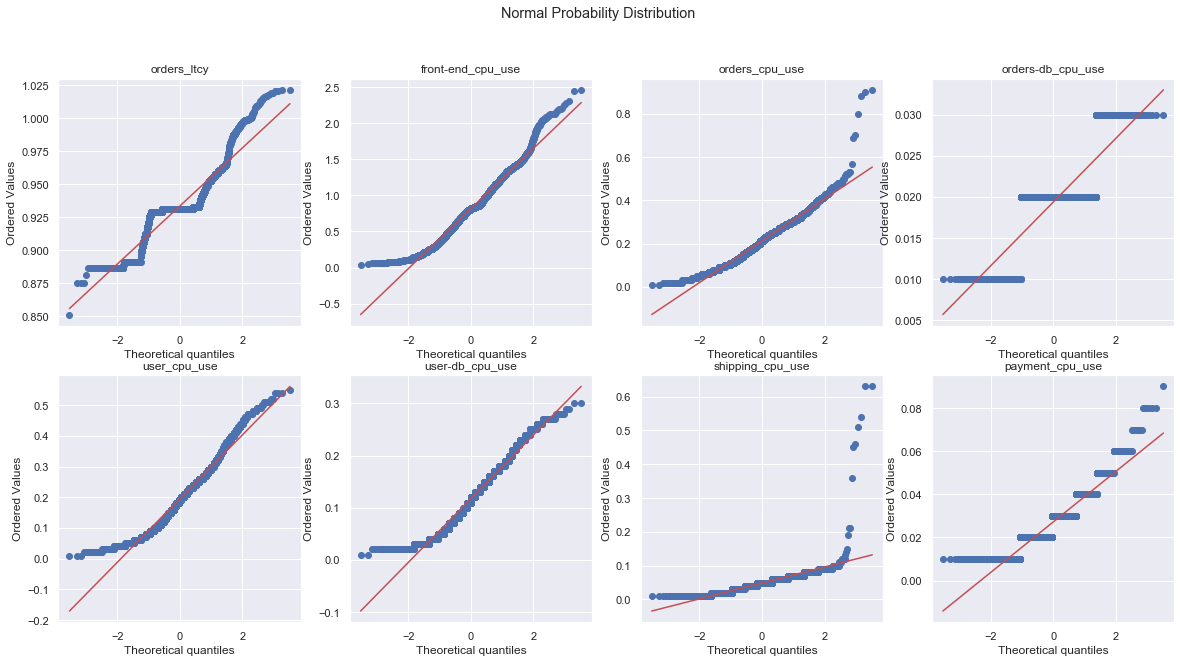

In [72]:
fig, ax = plt.subplots(2,4,figsize=(20,10))

# log_ltcy should look ok as its transformed above
stats.probplot(orders_flow_df['orders_ltcy'], plot=ax[0,0])
ax[0, 0].set_title('orders_ltcy')

stats.probplot(orders_flow_df['front-end_cpu_use'], plot=ax[0,1])
ax[0, 1].set_title('front-end_cpu_use')

stats.probplot(orders_flow_df['orders_cpu_use'], plot=ax[0,2])
ax[0, 2].set_title('orders_cpu_use')

stats.probplot(orders_flow_df['orders-db_cpu_use'], plot=ax[0,3])
ax[0, 3].set_title('orders-db_cpu_use')

stats.probplot(orders_flow_df['user_cpu_use'], plot=ax[1,0])
ax[1, 0].set_title('user_cpu_use')

stats.probplot(orders_flow_df['user-db_cpu_use'], plot=ax[1,1])
ax[1, 1].set_title('user-db_cpu_use')

stats.probplot(orders_flow_df['shipping_cpu_use'], plot=ax[1,2])
ax[1, 2].set_title('shipping_cpu_use')

stats.probplot(orders_flow_df['payment_cpu_use'], plot=ax[1,3])
ax[1, 3].set_title('payment_cpu_use')



fig.suptitle('Normal Probability Distribution')
plt.show()

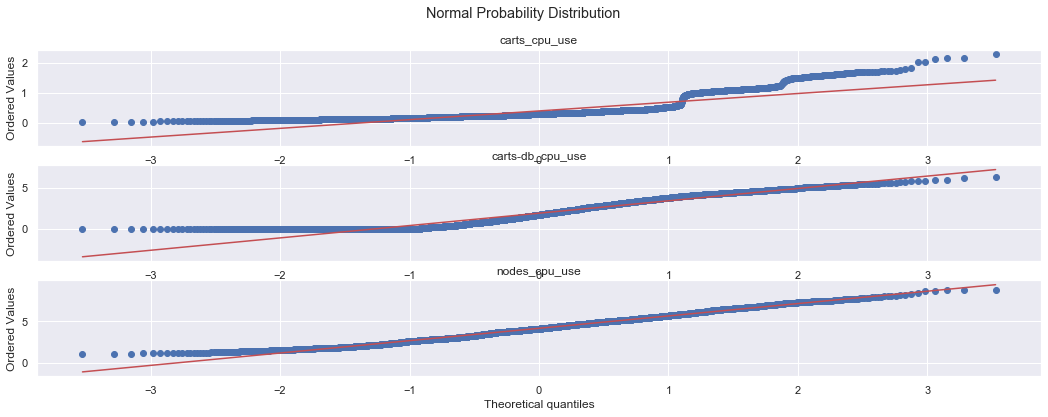

In [73]:
fig, ax = plt.subplots(3,figsize=(18,6))

stats.probplot(orders_flow_df['carts_cpu_use'], plot=ax[0])
ax[0].set_title('carts_cpu_use')

stats.probplot(orders_flow_df['carts-db_cpu_use'], plot=ax[1])
ax[1].set_title('carts-db_cpu_use')

stats.probplot(orders_flow_df['nodes_cpu_use'], plot=ax[2])
ax[2].set_title('nodes_cpu_use')

#stats.probplot(orders_flow_df['svc_req_size'], plot=ax[1,0])
#ax[1, 0].set_title('svc_req_size')

#stats.probplot(orders_flow_df['svc_resp_size'], plot=ax[1,1])
#ax[1, 1].set_title('svc_resp_size')

#stats.probplot(orders_flow_df['svc_pods'], plot=ax[1,2])
#ax[1, 2].set_title('svc_pods')

#stats.probplot(orders_flow_df['svc_req_rate'], plot=ax[2,0])
#ax[2, 0].set_title('svc_req_rate')

fig.suptitle('Normal Probability Distribution')
plt.show()

above Normal Probability Plots (MPP) illustrates so low variance for "orders-db_cpu_use" variable. Apparently, the orders-db_cpu_use is not affected when applying different loads to the application. We will drop this varible and not consider it.

In [74]:
#orders_flow_df = orders_flow_df.drop('orders-db_cpu_use', 1)
normalized_data = orders_flow_df

Text(0.5, 1.0, 'orders_ltcy NPP')

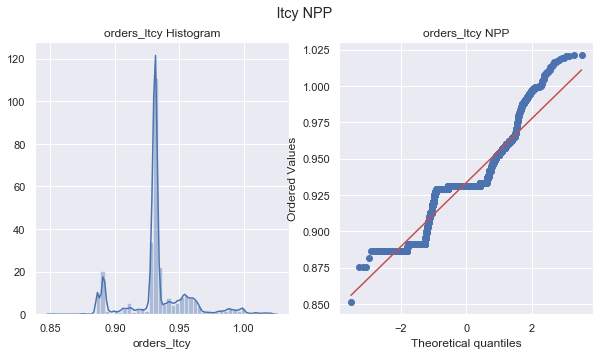

In [75]:
# orders_ltcy
#normalized_data['orders_ltcy'] = np.power(normalized_data.orders_ltcy, 0.5)

fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('ltcy NPP')

sns.distplot(normalized_data['orders_ltcy'], ax=ax[0])
ax[0].set_title('orders_ltcy Histogram')
stats.probplot(normalized_data['orders_ltcy'], plot=ax[1])
ax[1].set_title('orders_ltcy NPP')

In [76]:
orders_flow_df = normalized_data

# Checking Regression Assumptions

## Linearity

examine features to target scatterplot

In [77]:
variables = orders_flow_df.columns.values
for var in variables:
    print(var)

front-end_cpu_use
orders_cpu_use
orders-db_cpu_use
user_cpu_use
user-db_cpu_use
shipping_cpu_use
payment_cpu_use
carts_cpu_use
carts-db_cpu_use
front-end_pods
orders_pods
user_pods
shipping_pods
payment_pods
carts_pods
nodes_cpu_use
orders_req
orders_ltcy


Plot every variable against the latency 

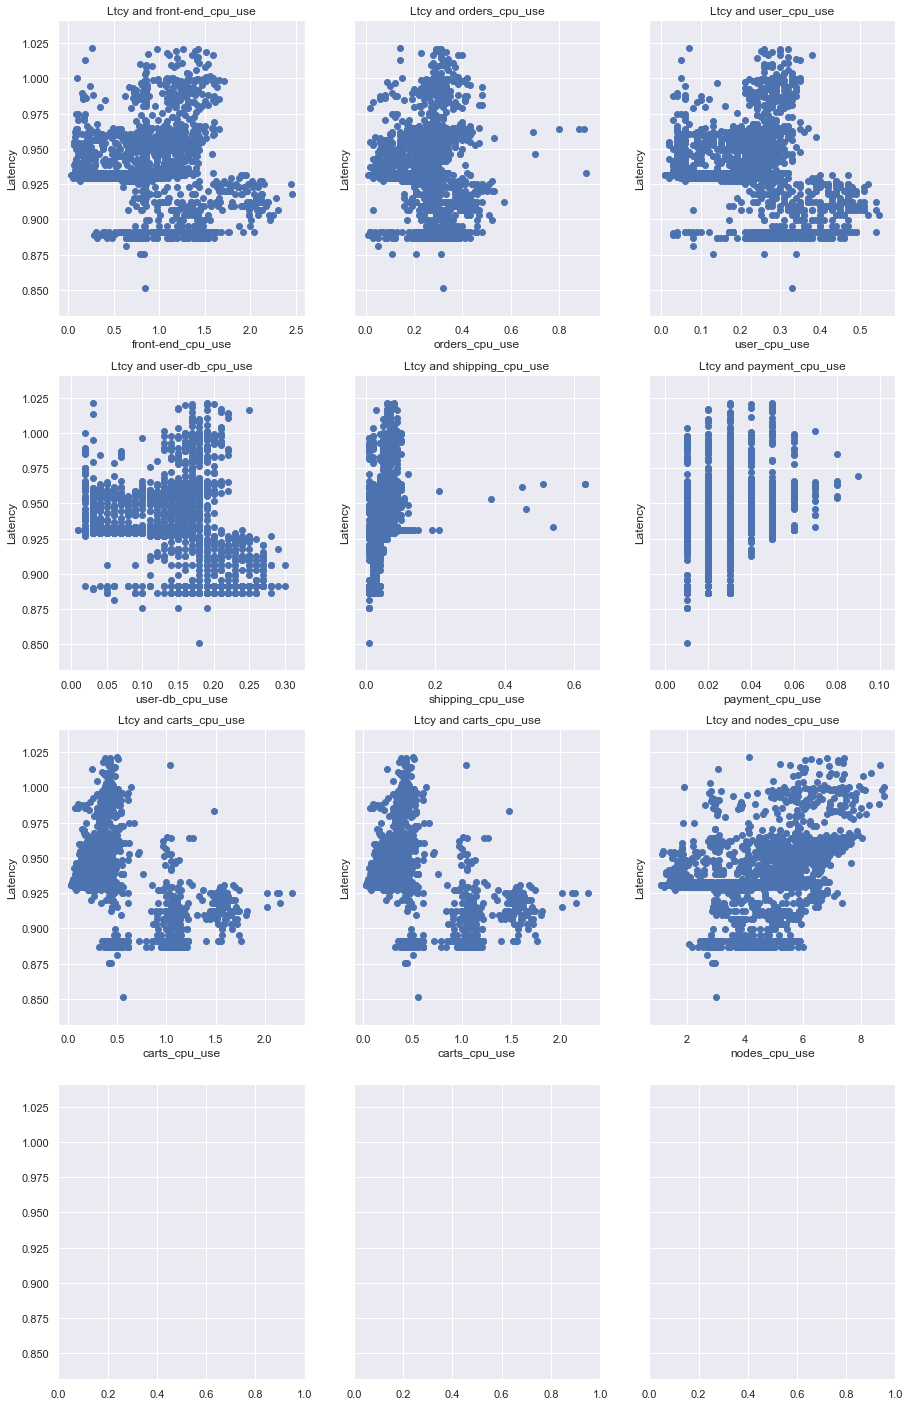

In [78]:
f, ax = plt.subplots(4, 3, sharey=True, figsize = (15,25))

ax[0,0].scatter(orders_flow_df['front-end_cpu_use'], orders_flow_df['orders_ltcy'])
ax[0,0].set_title('Ltcy and front-end_cpu_use')
ax[0,0].set_xlabel('front-end_cpu_use')
ax[0,0].set_ylabel('Latency')

ax[0,1].scatter(orders_flow_df['orders_cpu_use'], orders_flow_df['orders_ltcy'])
ax[0,1].set_title('Ltcy and orders_cpu_use')
ax[0,1].set_xlabel('orders_cpu_use')
ax[0,1].set_ylabel('Latency')

ax[0,2].scatter(orders_flow_df['user_cpu_use'], orders_flow_df['orders_ltcy'])
ax[0,2].set_title('Ltcy and user_cpu_use')
ax[0,2].set_xlabel('user_cpu_use')
ax[0,2].set_ylabel('Latency')

ax[1,0].scatter(orders_flow_df['user-db_cpu_use'], orders_flow_df['orders_ltcy'])
ax[1,0].set_title('Ltcy and user-db_cpu_use')
ax[1,0].set_xlabel('user-db_cpu_use')
ax[1,0].set_ylabel('Latency')

ax[1,1].scatter(orders_flow_df['shipping_cpu_use'], orders_flow_df['orders_ltcy'])
ax[1,1].set_title('Ltcy and shipping_cpu_use')
ax[1,1].set_xlabel('shipping_cpu_use')
ax[1,1].set_ylabel('Latency')

ax[1,2].scatter(orders_flow_df['payment_cpu_use'], orders_flow_df['orders_ltcy'])
ax[1,2].set_title('Ltcy and payment_cpu_use')
ax[1,2].set_xlabel('payment_cpu_use')
ax[1,2].set_ylabel('Latency')

ax[2,0].scatter(orders_flow_df['carts_cpu_use'], orders_flow_df['orders_ltcy'])
ax[2,0].set_title('Ltcy and carts_cpu_use')
ax[2,0].set_xlabel('carts_cpu_use')
ax[2,0].set_ylabel('Latency')

ax[2,1].scatter(orders_flow_df['carts_cpu_use'], orders_flow_df['orders_ltcy'])
ax[2,1].set_title('Ltcy and carts_cpu_use')
ax[2,1].set_xlabel('carts_cpu_use')
ax[2,1].set_ylabel('Latency')

ax[2,2].scatter(orders_flow_df['nodes_cpu_use'], orders_flow_df['orders_ltcy'])
ax[2,2].set_title('Ltcy and nodes_cpu_use')
ax[2,2].set_xlabel('nodes_cpu_use')
ax[2,2].set_ylabel('Latency')



plt.show()

In [79]:
if save:
    normalized_data.to_csv(path_or_buf=file_dir + 'order_flow_normalized_data.csv', index=True)

# Standardize Features

In [80]:
# Also save a standard normalized data to use with MLP

from sklearn.preprocessing import StandardScaler

targets = orders_flow_df['orders_ltcy']
inputs = orders_flow_df.drop(['orders_ltcy'], axis=1)

variables = inputs.columns.values

print('shape of inputs %', inputs.shape)

scaler = StandardScaler()
scaler.fit(inputs)
standarized_inputs = scaler.transform(inputs)
standarized_inputs = pd.DataFrame(standarized_inputs, columns=variables)

targets = pd.DataFrame(targets.values, columns=['orders_ltcy'])

scaled_data = pd.concat([standarized_inputs,targets], axis=1, sort=False)
scaled_data['date'] = idx
scaled_data = to_time_series(scaled_data)

if save:
     scaled_data.to_csv(path_or_buf=file_dir + 'order_flow_standardized_data.csv', index=True)
        
scaled_data.head()        
    

shape of inputs % (3290, 17)


,front-end_cpu_use,orders_cpu_use,orders-db_cpu_use,user_cpu_use,user-db_cpu_use,shipping_cpu_use,payment_cpu_use,carts_cpu_use,carts-db_cpu_use,front-end_pods,orders_pods,user_pods,shipping_pods,payment_pods,carts_pods,nodes_cpu_use,orders_req,orders_ltcy
date,,,,,,,,,,,,,,,,,,
2020-03-26 19:46:22,0.0561,1.4990,-1.9529,1.2788,1.1732,-0.9474,-1.3901,0.4524,-1.2009,-1.2440,-1.2472,-1.2472,-1.2472,-1.2472,-1.2472,0.5768,-1.2579,0.8866
2020-03-26 19:46:37,-1.7518,-1.7643,0.1359,-1.4725,-1.5712,5.3026,-0.5779,1.6826,-1.0934,0.7754,0.7746,0.7746,0.7746,0.7746,0.7746,-1.3139,-1.5949,0.9587
2020-03-26 19:46:52,-1.0143,-0.4386,0.1359,-0.9033,-1.4098,0.3683,1.0465,-0.2506,-0.7709,0.7754,0.7746,0.7746,0.7746,0.7746,0.7746,0.2269,-1.1501,0.9598
2020-03-26 19:47:07,0.0799,0.7851,0.1359,0.7096,1.1732,-1.2764,-1.3901,0.3352,-1.1946,-1.2440,-1.2472,-1.2472,-1.2472,-1.2472,-1.2472,-0.7891,-1.3412,0.8913
2020-03-26 19:47:22,0.4605,0.2752,0.1359,0.4250,0.3660,1.0262,1.8587,-0.2506,0.9302,1.7851,1.7856,1.7856,1.7856,1.7856,1.7856,0.4624,0.7680,0.9311
